In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.describe()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
count,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.00000,54038.000000,54038.000000,54038.000000,54038.000000,...,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000,54038.000000
mean,6.786058,31.725730,5.559310,20.565250,0.034513,0.18313,6.751545,0.084385,0.081258,0.084570,...,0.089530,0.090362,0.090418,0.091713,0.092879,0.092805,0.093508,0.090658,0.092824,0.106240
std,10.762527,56.145442,10.839189,32.442537,0.196789,1.52133,10.742018,0.277967,0.273233,0.278243,...,0.285509,0.286703,0.286782,0.288623,0.290266,0.290162,0.291146,0.287125,0.290188,0.308147
min,1.000000,1.000000,1.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,10.000000,2.500000,9.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,35.000000,5.875000,24.000000,0.000000,0.00000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,121.000000,1095.000000,608.000000,363.000000,4.000000,56.00000,121.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
filtered_data = data[data['CarDriver'] == 1]


In [4]:
target = filtered_data['Hsptlsns'].shift(-1)

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree



X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 112.01880794701987
Mean Absolute Error (MAE): 5.354701986754967
R-squared (R2): 0.47797772737357436


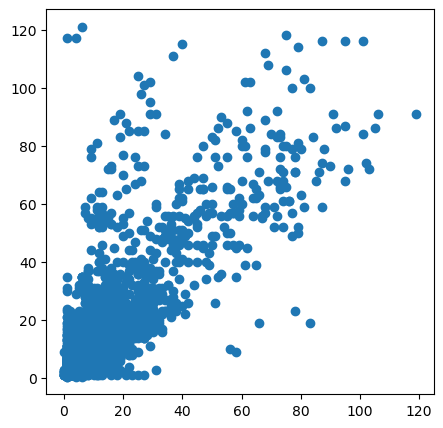

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predictions)

In [7]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predicted_counts = regressor.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 6.301804716528523
MAE: 3.883237626469784
R^2: 0.5594739069789283


# CarPngr

In [11]:
filtered_data2 = data[data['CarPngr'] == 1]
target = filtered_data2['Hsptlsns'].shift(-1)


In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 16.15735243300977
Mean Absolute Error (MAE): 2.5458486476298186
R-squared (R2): 0.3128794776222956


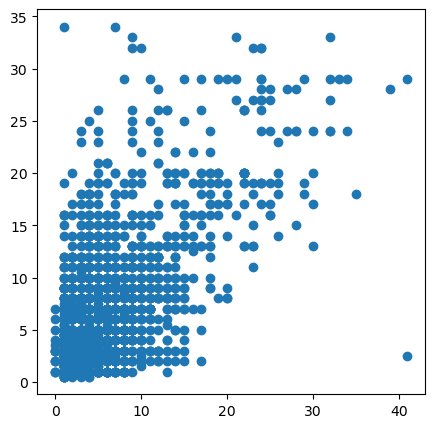

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predictions)

In [14]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predicted_counts = regressor.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 3.285912202642707
MAE: 2.2372537659327927
R^2: 0.0850702757469386


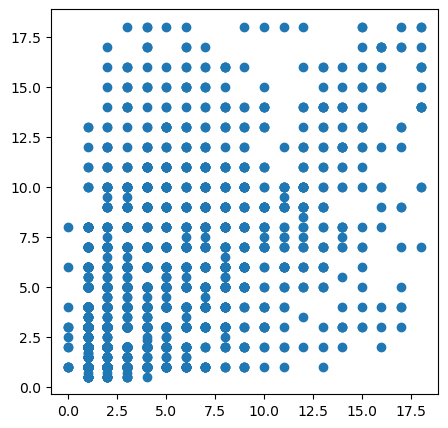

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

# Mtrcyclist

In [16]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
target = filtered_data3['Hsptlsns'].shift(-1)


In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]




y = filtered_data3['Hsptlsns']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 77.93492134164441
Mean Absolute Error (MAE): 4.7727812407242505
R-squared (R2): 0.502947380429347


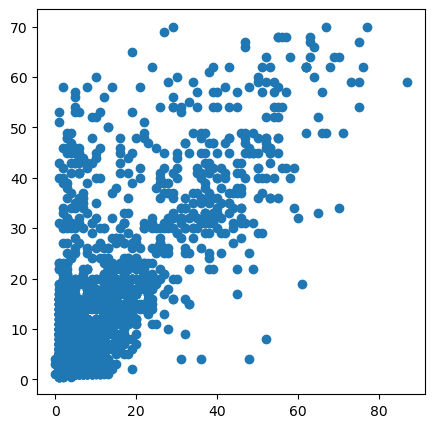

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predictions)

In [19]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predicted_counts = regressor.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 6.541625799307043
MAE: 3.8872699386503067
R^2: 0.4475289347733642


# PdlCyclist

In [12]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Hsptlsns'].shift(-1)


In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]




y = filtered_data4['Hsptlsns']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 84.99723496088481
Mean Absolute Error (MAE): 5.223496088481252
R-squared (R2): -0.06816287416937072


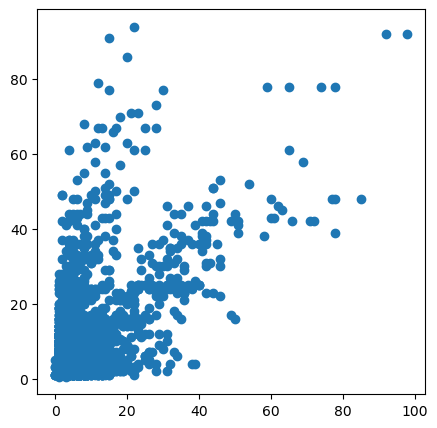

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predictions)

In [15]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predicted_counts = regressor.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 6.428998232417338
MAE: 4.184246954595792
R^2: -0.28630517922231147


# Pedestrian

In [8]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Hsptlsns'].shift(-1)


In [9]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]




y = filtered_data5['Hsptlsns']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 28.488362541073386
Mean Absolute Error (MAE): 3.277382256297919
R-squared (R2): 0.03258986431915889


In [10]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

xregressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predictions = regressor.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 14.026541573660714
Mean Absolute Error (MAE): 2.2621372767857144
R-squared (R2): 0.3479897466761761


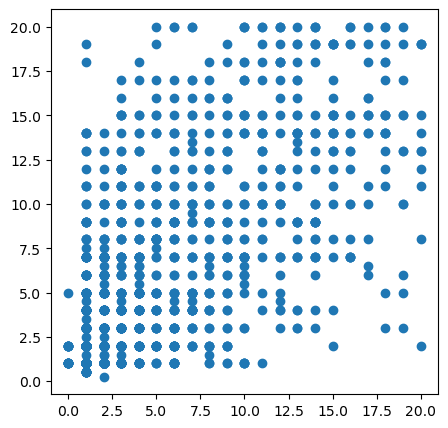

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predictions)

In [11]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


regressor = DecisionTreeRegressor(criterion='poisson')
regressor.fit(x_train, y_train)

predicted_counts = regressor.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

RMSE: 3.7659265175999255
MAE: 2.268647693452381
R^2: 0.3407539970133031


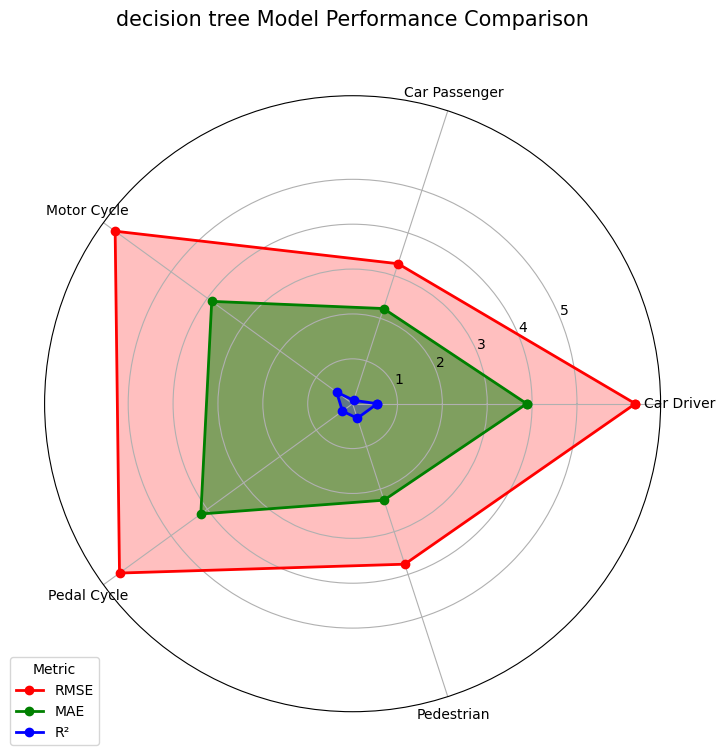

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [6.30, 3.28 , 6.54 , 6.42 , 3.76]
mae_values = [3.88,2.23 ,3.88 ,4.18 , 2.26]
r2_values = [ 0.55,  0.08 ,0.44 ,0.28  ,0.34]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('decision tree Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


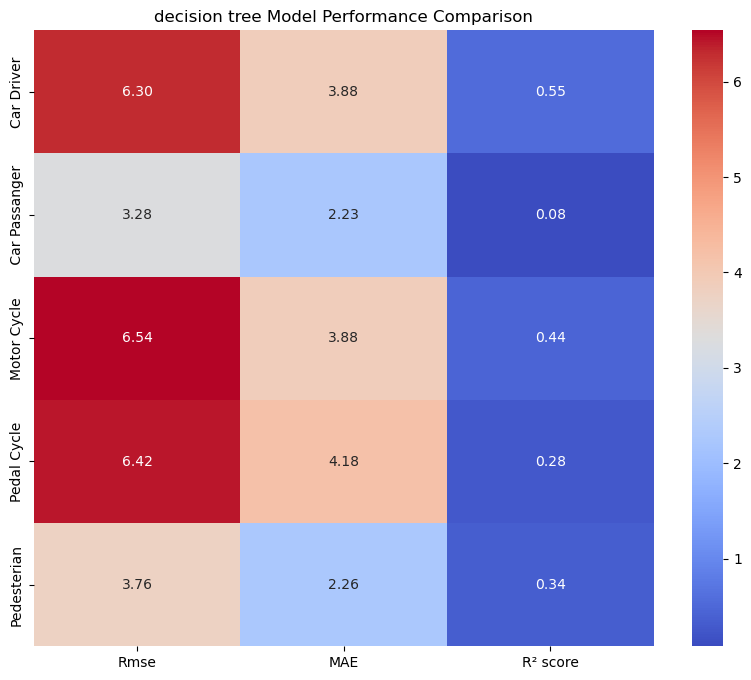

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
Rmse_values = [6.30, 3.28 , 6.54 , 6.42 , 3.76]
mae_values =[3.88,2.23 ,3.88 ,4.18 , 2.26]
r2_values = [ 0.55,  0.08 ,0.44 ,0.28  ,0.34]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['Rmse', 'MAE', 'R² score']
data = np.array([Rmse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('decision tree Model Performance Comparison')

plt.show()